## Estadística Aplicada

Sesión 15 - octubre 20

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics. tsaplots import plot_acf, plot_pacf, plot_predict
# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA 
## pdmarima
import pmdarima as pm

In [17]:
# Datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv')

In [18]:
# No presenta frecuencia
pasajeros.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
# Asignar frecuencia
pasajeros.dtypes

Month                      object
Thousands of Passengers     int64
dtype: object

In [20]:
## Formato tiempo
# Tiempo index
#Tiempo frecuencia
pasajeros['Month'] = pd.to_datetime(pasajeros['Month'])
pasajeros = pasajeros.set_index('Month')
pasajeros = pasajeros.asfreq('MS')

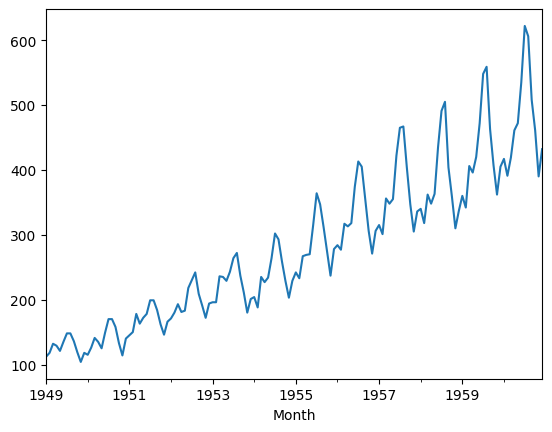

In [21]:
#Graficar
pasajeros['Thousands of Passengers'].plot();

In [22]:
##prueba de raiz unitaria
prueba_adf = adfuller(pasajeros['Thousands of Passengers'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.99

No se Rechaza H0, lo que significa  que "Thousands of Passengers" es una serie NO estacionaria

In [24]:
#Primeras diferencias 
pasajeros['Passengers_Diff'] = pasajeros['Thousands of Passengers'].diff()

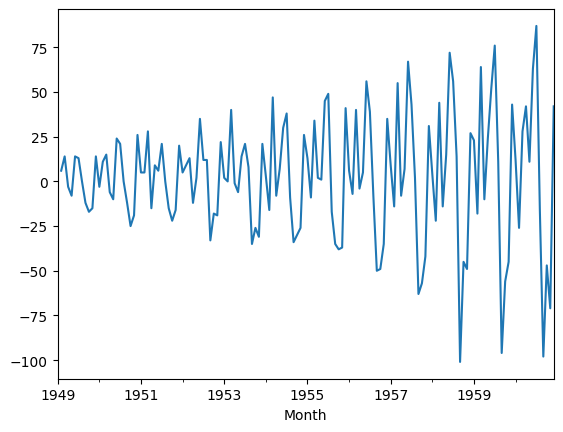

In [25]:
pasajeros['Passengers_Diff'].plot();

In [26]:
##Prueba
prueba_adf1 = adfuller(pasajeros['Passengers_Diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.05

NO rechazamos H0, las 1ras diferencias son una serie no estacionaria

In [27]:
pasajeros['2das_Diff'] = pasajeros['Passengers_Diff'].diff()

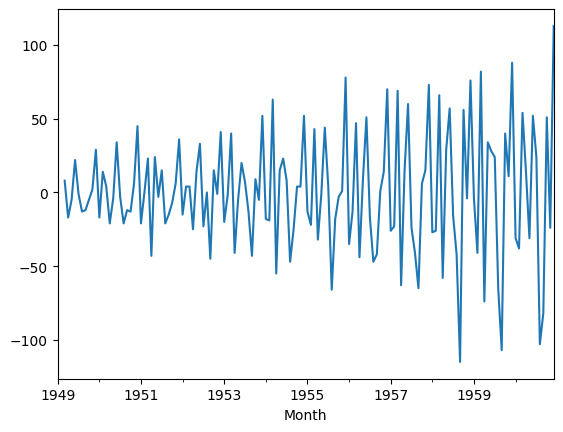

In [28]:
pasajeros['2das_Diff'].plot();

In [29]:
##Prueba
prueba_adf2 = adfuller(pasajeros['2das_Diff'].dropna())
pvalue2 = prueba_adf2[1]
pvalue2.round(2)

0.0

Rechazamos H0, las segundas diferencias de Thousands of Passengers son una serie estacionaria

* passengers I(2)
* 1ras diff I(1)
* 2ndas diferencias I(0)

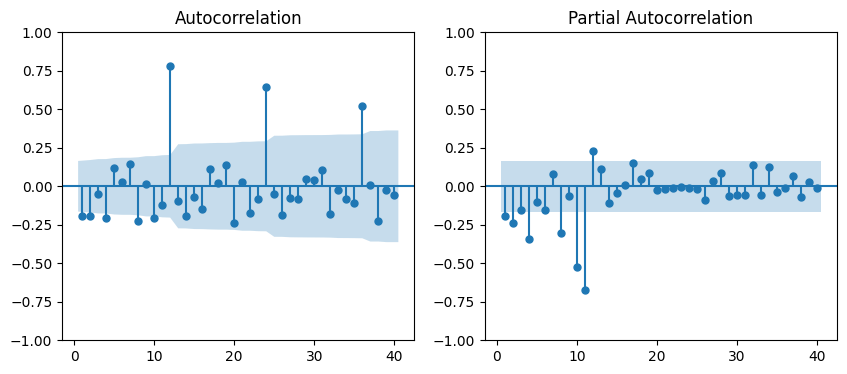

In [33]:
## correlaciones
ig, ax = plt.subplots(1,2, figsize = (10,4))
##1er subgráfica
plot_acf(pasajeros['2das_Diff'].dropna(), zero = False, lags=40, ax= ax[0])
##2da gráfica
plot_pacf(pasajeros['2das_Diff'].dropna(), zero=False, lags=40, ax=ax[1])
plt.show();

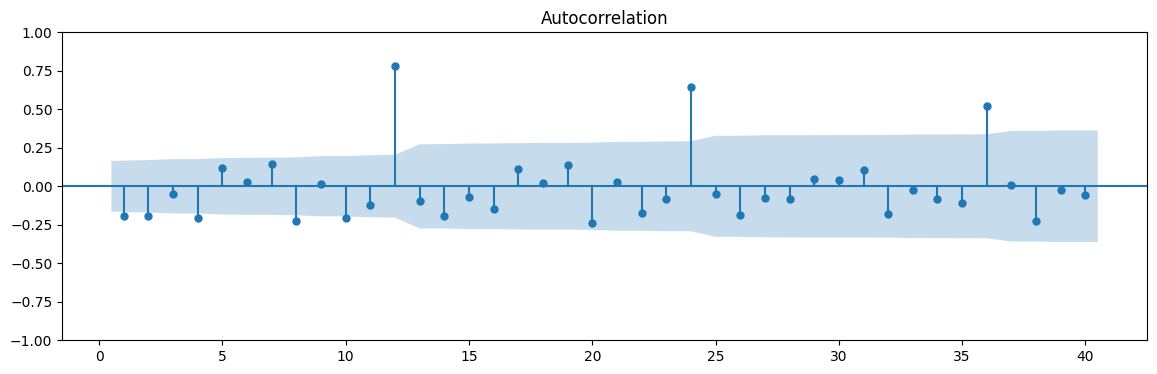

In [34]:
plt.rcParams['figure.figsize'] = (14,4)
plot_acf(pasajeros['2das_Diff'].dropna(), zero=False, lags=40);


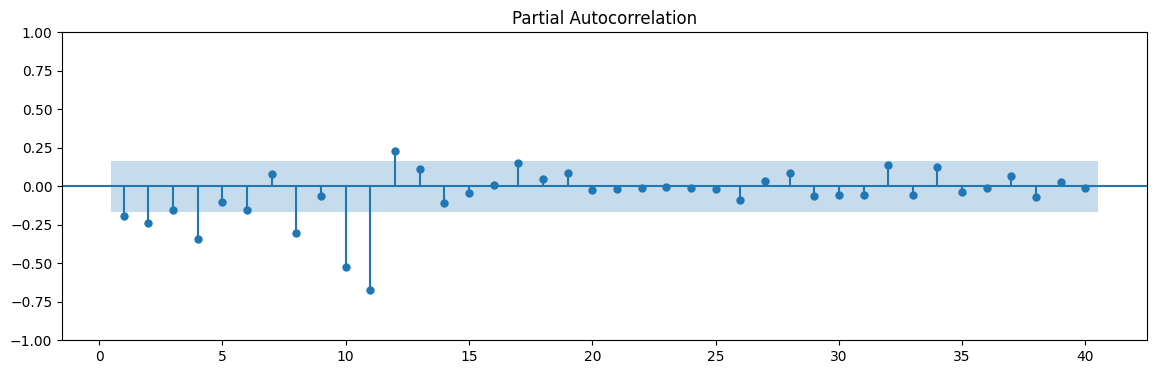

In [35]:
plt.rcParams['figure.figsize'] = (14,4)
plot_pacf(pasajeros['2das_Diff'].dropna(), zero=False, lags=40);

Estos patrones repetitivos de las gráficas de autocorrelación nos muestran una serie con componente estacional

In [39]:
## determinar el orden del proces
pm.auto_arima(pasajeros['2das_Diff'].dropna(), start_p=1, start_q=1, max_p=7,max_q=7, ic= 'aic',  seasonal=True, m=12, start_P=1, start_Q=1, max_P=7, max_Q=7)

ARIMA(order=(5, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

SARIMA(p, I(d), q)(P,D,Q)
* passengers        SARIMA(5,2,0)(2,1,0,12)
* 1ras diferencias  SARIMA(5,1,0)(2,1,0,12)
* 2ndas diferencias SARIMA(5,0,0)(2,1,0,12)

In [43]:
model = ARIMA(pasajeros['Thousands of Passengers'], order=(5,2,0), seasonal_order=(2,1,0,12))
results= model.fit()
print(results.summary())

                                    SARIMAX Results                                     
Dep. Variable:          Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(5, 2, 0)x(2, 1, 0, 12)   Log Likelihood                -513.021
Date:                          Thu, 26 Oct 2023   AIC                           1042.042
Time:                                  16:09:11   BIC                           1064.982
Sample:                              01-01-1949   HQIC                          1051.363
                                   - 12-01-1960                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1473      0.097    -11.874      0.000      -1.337      -0.958
ar.L2         -0.8773      0.119     -7.382      0.

In [44]:
pasajeros['Modelo_SARIMA'] = results.predict()

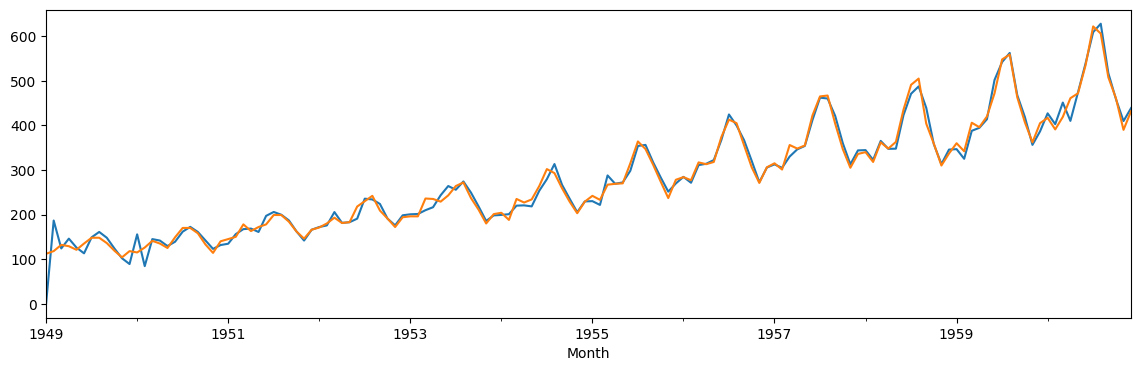

In [45]:
pasajeros['Modelo_SARIMA'].plot()
pasajeros['Thousands of Passengers'].plot();

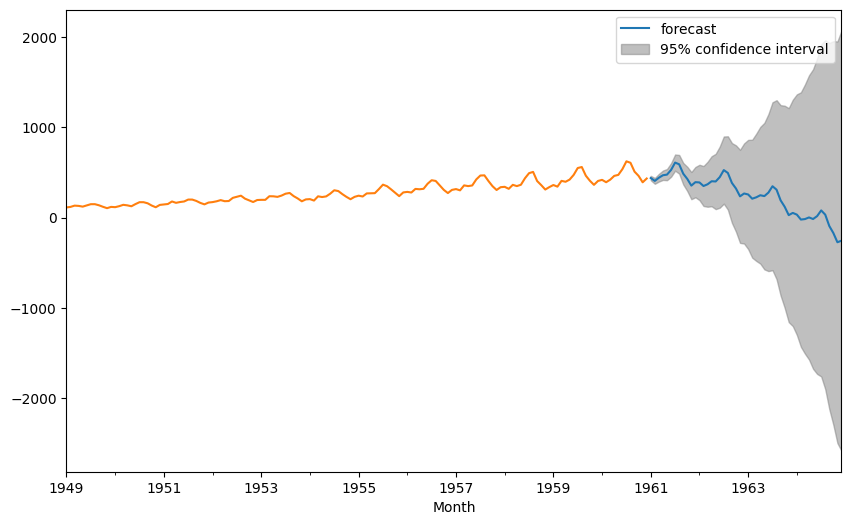

In [47]:
plt.rcParams['figure.figsize'] = (10,6)
plot_predict(results, start='1961-01-01', end='1964-12-01')
pasajeros['Thousands of Passengers'].plot()
plt.show();